<a href="https://colab.research.google.com/github/mehdiguel/ML_Projects/blob/main/Facebook's_Prophet_Time_Series_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Facebook Prophet Tutorial 
![](facebookprophet.png)

#### Installing
+ pip install pystan
+ pip install fbprophet
+ conda install -c conda-forge fbprophet

### Intro To Facebook Prophet
+ Steps
    - Initialize Model :: Prophet()
    - Set columns as ds,y
    - Fit dataset :: Prophet().fit()
    - Create Dates To predict :: Prophet().make_future_dataframe(periods=365)
    - Predict :: Prophet().predict(future_dates)  
    - Plot :: Prophet().plot(predictions)

In [ ]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
!pip install fbprophet

In [ ]:
# Load FB Prophet
import fbprophet

In [ ]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
# Load our Dataset
import pandas as pd
url = 'temperature-quotidienne-regionale.csv'
df = pd.read_csv(url,sep=";")


In [ ]:
df.head()

,date,code_insee_region,region,tmin,tmax,tmoy
0,2016-03-12,44,Grand-Est,-0.73,10.46,4.86
1,2016-03-13,75,Nouvelle-Aquitaine,1.27,11.80,6.53
2,2016-03-17,94,Corse,8.45,14.20,11.32
3,2016-03-20,75,Nouvelle-Aquitaine,5.86,14.29,10.07
4,2016-03-20,44,Grand-Est,0.56,9.24,4.90


In [ ]:
x = df['date']
y = df['tmoy']
df.plot(x,y)

KeyError: ignored

In [ ]:
#yt = yt -y(t-1)
df['no_of_flights'] = df['no_of_flights'] - df['no_of_flights'].shift(1)

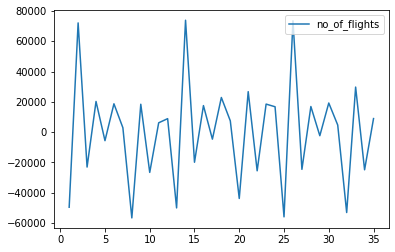

In [ ]:
df.plot()

In [ ]:
from fbprophet import Prophet

In [ ]:
# Features of Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
# Initialize the Model
model = Prophet()

#### Parameters
+ growth: linear/logistic
+ seasonality:additive/multiplicative
+ holidays:
+ changepoint:

In [ ]:
df.columns

Index(['date', 'code_insee_region', 'region', 'tmin', 'tmax', 'tmoy'], dtype='object')

In [ ]:
# Works with a ds and y column names
df.rename(columns={'Dates':'ds','no_of_flights':'y'},inplace=True)

In [ ]:
df.head()

,date,code_insee_region,region,tmin,tmax,tmoy
0,2016-03-12,44,Grand-Est,-0.73,10.46,4.86
1,2016-03-13,75,Nouvelle-Aquitaine,1.27,11.80,6.53
2,2016-03-17,94,Corse,8.45,14.20,11.32
3,2016-03-20,75,Nouvelle-Aquitaine,5.86,14.29,10.07
4,2016-03-20,44,Grand-Est,0.56,9.24,4.90


In [ ]:
df = df[1:]

In [ ]:
df.head()

,date,code_insee_region,region,tmin,tmax,tmoy
1,2016-03-13,75,Nouvelle-Aquitaine,1.27,11.80,6.53
2,2016-03-17,94,Corse,8.45,14.20,11.32
3,2016-03-20,75,Nouvelle-Aquitaine,5.86,14.29,10.07
4,2016-03-20,44,Grand-Est,0.56,9.24,4.90
5,2016-03-21,11,Ile-de-France,3.64,10.36,7.00


In [ ]:
# Fit our Model to our Data
model.fit(df)

NameError: ignored

In [ ]:
# Shape of Dataset
df.shape

In [ ]:
# Create Future Dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [ ]:
# Shape after adding 365 days
future_dates.shape

In [ ]:
future_dates.head()

In [ ]:
# Make Prediction with our Model
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

#### Narrative
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

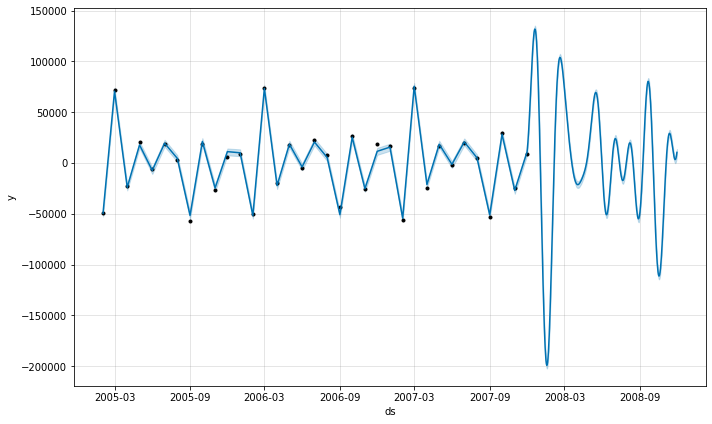

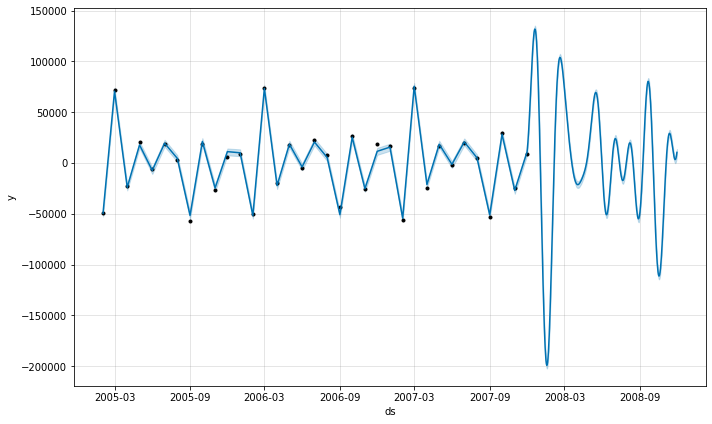

In [ ]:
# Plot Our Predictions
model.plot(prediction)

#### Narrative
+ A Trending data
+ Black dots : the actual data points in our dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

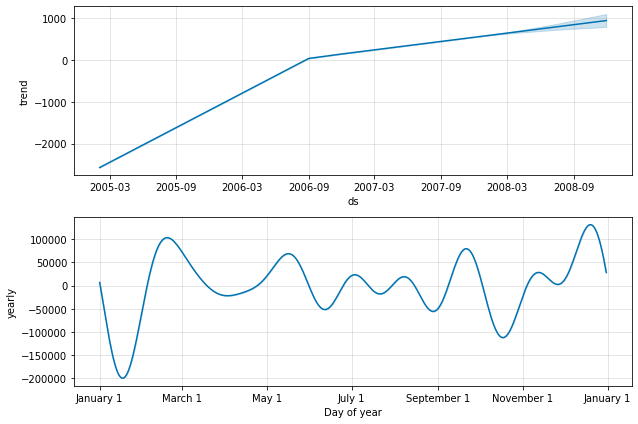

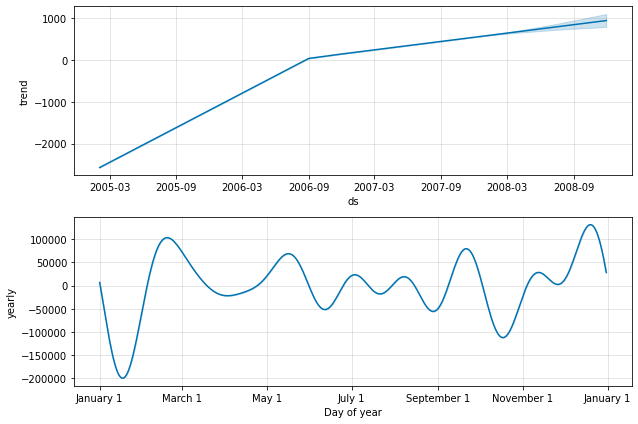

In [ ]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)

### Cross Validation
+ For measuring forecast error by comparing the predicted values with the actual values
+ initial:the size of the initial training period
+ period : the spacing between cutoff dates
+ horizon : the forecast horizon((ds minus cutoff)
+  By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [ ]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

In [ ]:
df.shape

(35, 2)

In [ ]:
cv = cross_validation(model,initial='35 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2005-06-09 00:00:00 and 2006-12-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.
C:\Users\aslim\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
C:\Users\aslim\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
C:\Users\aslim\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it w

In [ ]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-01,7.761960e+05,7.761960e+05,7.761960e+05,18766.0,2005-06-09
1,2005-08-01,-7.096470e+05,-7.096470e+05,-7.096470e+05,2943.0,2005-06-09
2,2005-09-01,1.520942e+06,1.520942e+06,1.520942e+06,-56651.0,2005-06-09
3,2005-10-01,4.977600e+05,4.977600e+05,4.977600e+05,18459.0,2005-06-09
4,2005-11-01,-2.644657e+05,-2.644657e+05,-2.644657e+05,-26574.0,2005-06-09


#### Performance Metrics


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_pm = performance_metrics(cv)

In [ ]:
df_pm

,horizon,mse,rmse,mae,mape,coverage
0,31 days,2.166651e+11,465473.003923,332074.656221,25.543097,0.00
1,53 days,2.001862e+11,447421.691286,320864.640152,75.985257,0.00
2,57 days,1.376020e+11,370947.384962,236881.852954,61.897852,0.00
3,58 days,1.374313e+11,370717.272862,231946.621763,61.849443,0.00
4,62 days,1.374965e+11,370805.253778,235275.645936,61.876237,0.00
5,84 days,6.327505e+11,795456.167445,451526.461197,8.305516,0.00
6,85 days,6.298315e+11,793619.253459,443812.758695,7.870491,0.00
7,89 days,6.298483e+11,793629.832551,444721.612043,7.685867,0.00
8,90 days,6.298153e+11,793609.020841,443551.607827,7.652340,0.00
9,114 days,6.504754e+10,255044.195075,168978.543897,7.181872,0.00


### Visualizing Performance Metrics
+ cutoff: how far into the future the prediction was

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

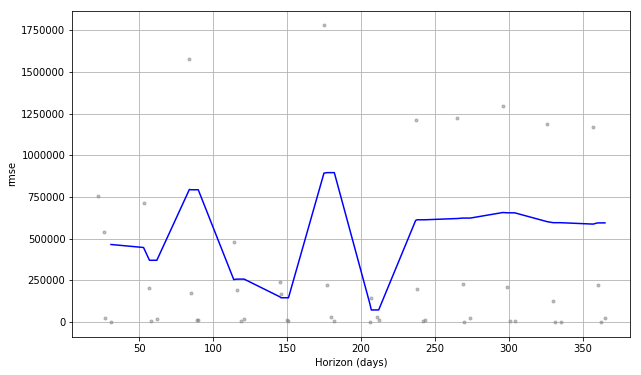

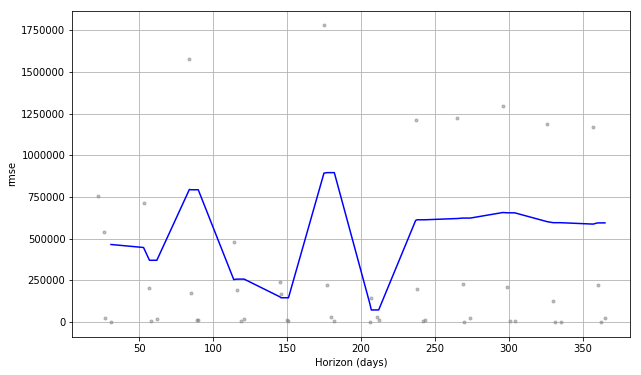

In [ ]:
plot_cross_validation_metric(cv,metric='rmse')